In [20]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/M1_S2/ML/ProjetML/src
from mltools import *
from loss import *
from module import *
from encapsulage import *
from sklearn.metrics import ConfusionMatrixDisplay

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/M1_S2/ML/ProjetML/src


<ipython-input-5-315829343a66>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([np.array([x,y]).tolist() for x, y in zip(X,Y_onehot)])


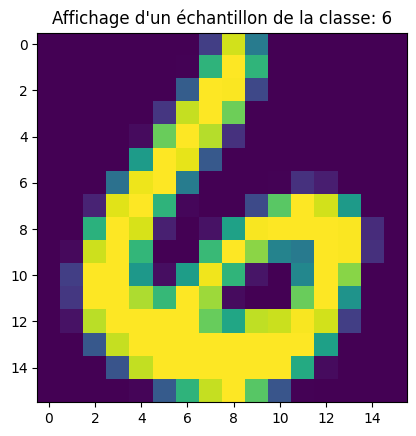

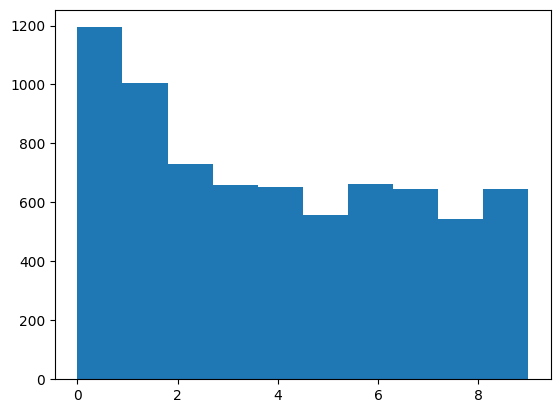

In [5]:
X,Y = load('../data/usps_train.txt')
Xt,Yt = load('../data/usps_test.txt')

Y = Y.astype(int)
Y_onehot = np.zeros((Y.size,10));
Y_onehot[np.arange(Y.size),Y]=1
data = np.array([np.array([x,y]).tolist() for x, y in zip(X,Y_onehot)])

# affichage d'un échantillon
plt.figure()
index = 0
plt.imshow(X[index].reshape(16,16), interpolation=None)
plt.title('Affichage d\'un échantillon de la classe: '+str(Y[index]))

# étude très rapide des données:
plt.figure()
plt.hist(Y, 10) # histogramme de répartition des 10 classes
plt.show()

100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


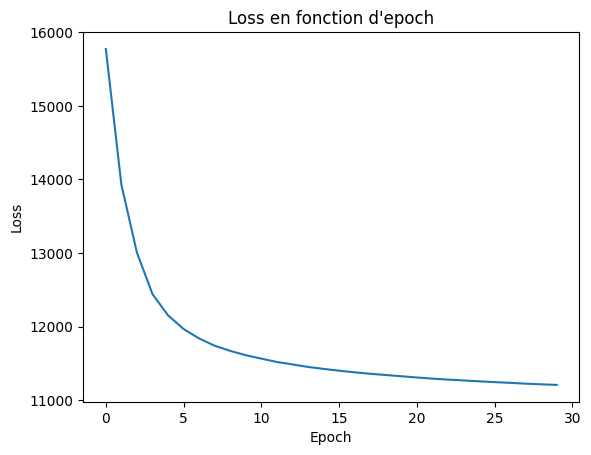

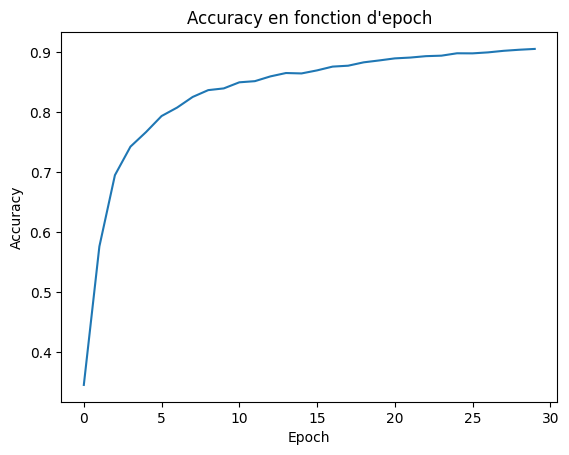

In [32]:
np.random.seed(6)
#ini
nb_couche_latentes = 150
MLin1 = Linear(X.shape[1],nb_couche_latentes)
MtanH = TanH()
MLin2 = Linear(MLin1._parameters['w'].shape[0], 10) # 10 classes
MSig = Sigmoide()
#ini seq
net = Sequentiel(MLin1, MtanH, MLin2, MSig)

#SGD
nb_epoch = 30
l,s = SGD(net, data, SMCELoss(), eps=1e-2, batch_taille=1000, nb_iter=nb_epoch)
#loss
plt.plot(np.arange(nb_epoch),l)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss en fonction d'epoch")
plt.show()
# accuracy
plt.plot(np.arange(nb_epoch),s)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction d'epoch")
plt.show()

In [33]:
Yt = Yt.astype(int)
Yt_onehot = np.zeros((Yt.size,10));
Yt_onehot[np.arange(Yt.size),Yt]=1

print("Score sur data train:", Optim(net, SMCELoss(),eps=1e-2).score(X, Y_onehot))
print("Score sur data test:", Optim(net, SMCELoss(),eps=1e-2).score(Xt, Yt_onehot))

Score sur data train: 0.9053627760252366
Score sur data test: 0.8290981564524166


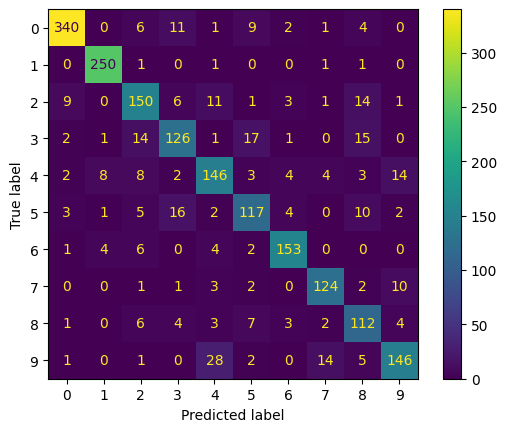

In [34]:
y_test_pred = np.argmax(net.forward(Xt), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_test_pred, Yt)

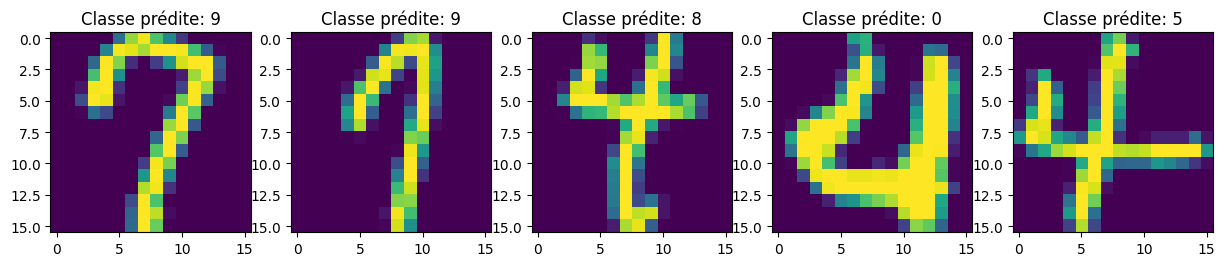

In [19]:
# prediction = argmax
y_pred = np.argmax(logsoftmax(net.forward(X)), axis = 1)
# accu
res = np.where(y_pred != Y)[0][:5] # prendre 5 exemples ou on a mal predit

fig, axs = plt.subplots(1, len(res), figsize=(15, 15))

for i in range(len(res)):
  index = res[i]
  axs[i].imshow(X[index].reshape(16,16), interpolation=None)
  index = res[i]
  #plt.imshow(X[index].reshape(16,16), interpolation=None)
  axs[i].set_title('Classe prédite: '+ str(y_pred[index]))